In [1]:
import sys
sys.path.append('../')
from PINN_Survey.problems.poisson_2d_steep.data.load import load_poisson_bounds
from PINN_Survey.problems.poisson_2d_steep.v1 import Poisson, Poisson_Soft_Mesh,Poisson_Domain_Transformer
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_true, U_true, X_bounds, U_bounds, _ = load_poisson_bounds()

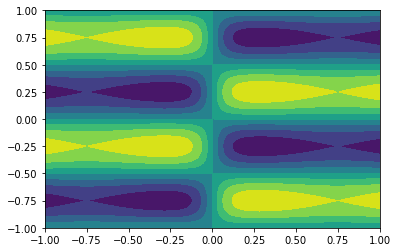

In [6]:
plt.tricontourf(X_true[:,0], X_true[:,1], U_true[:,0])

In [7]:
X = np.vstack(X_bounds)
U = np.vstack(U_bounds)

idx = np.random.choice( list(range(X_true.shape[0])), size=5000 )
X_df = X_true[idx,:]

lower_bound = np.min(X_true,axis=0)
upper_bound = np.max(X_true,axis=0)

In [8]:
model = Poisson(lower_bound, upper_bound, [2,20,20,20,20,20,20,20,1])
model.train_BFGS(X,U,X_df,True)

U_hat = model.predict(X_true)

print("RMSE", np.sqrt(np.mean((U_true[:,0] - U_hat[:,0])**2)) )
print("Relative Error", np.linalg.norm(U_true-U_hat,2)/np.linalg.norm(U_true,2))






INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.005366
  Number of iterations: 11223
  Number of functions evaluations: 11984
RMSE 0.02623104234383157
Relative Error 0.039162987195941884


In [9]:
model = Poisson_Soft_Mesh(lower_bound, upper_bound, [2,20,20,20,20,20,20,1], [2,20,20])
model.train_BFGS(X,U,X_df,True)
U_hat = model.predict(X_true)

print("RMSE", np.sqrt(np.mean((U_true[:,0] - U_hat[:,0])**2)) )
print("Relative Error", np.linalg.norm(U_true-U_hat,2)/np.linalg.norm(U_true,2))

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.002924
  Number of iterations: 10493
  Number of functions evaluations: 11156
RMSE 0.022844812717723664
Relative Error 0.03410734107439276


In [11]:
model = Poisson_Domain_Transformer(lower_bound, upper_bound,2,1,20,8)
model.train_BFGS(X,U,X_df,True)
U_hat = model.predict(X_true)

print("RMSE", np.sqrt(np.mean((U_true[:,0] - U_hat[:,0])**2)) )
print("Relative Error", np.linalg.norm(U_true-U_hat,2)/np.linalg.norm(U_true,2))

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.001549
  Number of iterations: 7392
  Number of functions evaluations: 7994
RMSE 0.023725505309037106
Relative Error 0.03542221648899024
